<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''ce projet a pour but de predire si une personne survivrait ou pas suite au naufrage d'un bateau.
Il s'agit d'un algorithme supervise de classification binaire.
Pour resoudre cela, j'ai ultilise le model de Regression Logistic'''

In [ ]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/tested.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# visualisation avec countplot

plt.figure(figsize=(8,8), dpi=100)
sns.countplot(x='Survived', data= df, palette='RdBu_r');

In [ ]:
# visualisation avec countplot en mettant enfonction du sexe (comme hue='sex')


plt.figure(figsize=(8,8), dpi=100)
sns.countplot(x='Survived', data=df, palette='RdBu_r', hue='Sex');

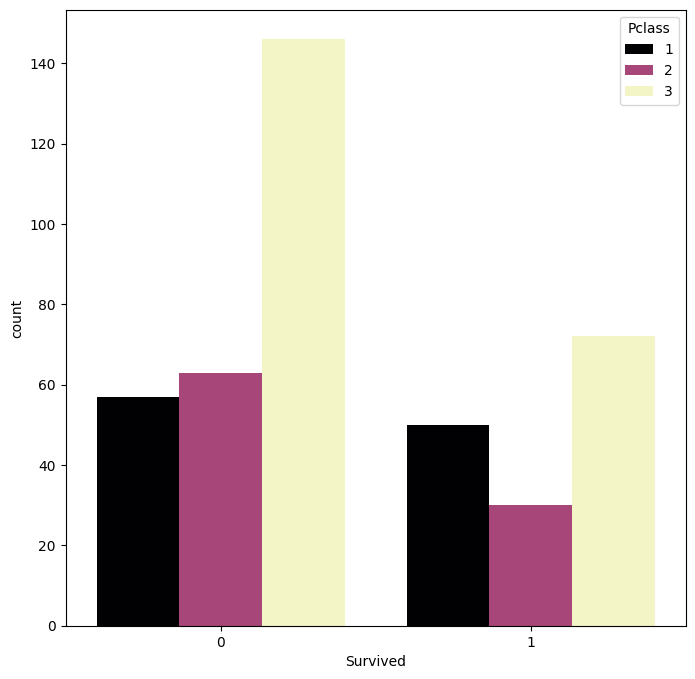

In [ ]:
# visualisation avec countplot en mettant enfonction du umero de classw (comme hue='Pclass')


plt.figure(figsize=(8,8), dpi=100)
sns.countplot(x='Survived', data=df, palette='magma', hue='Pclass');

<Figure size 800x800 with 0 Axes>

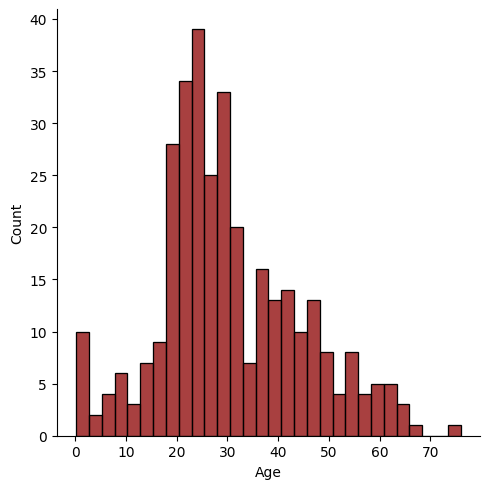

In [ ]:
# visualisation dee l'histogramme de l'age ave displot



plt.figure(figsize=(8,8), dpi=100)
sns.displot(df['Age'], color='darkred', kde=False, bins=30);


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Visualisation des donnees manquantes en utilisant heatmap

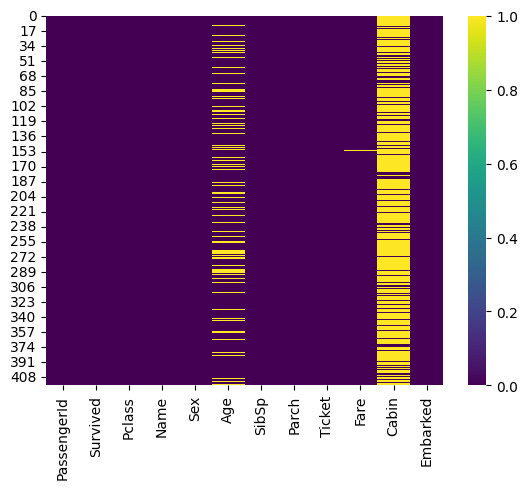

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis');

In [ ]:
df['Pclass'].is_unique

In [ ]:
# etant donne que nous avons des donnness manquantes, il nous faut du feature engeeniering
# c'est-a-dire preparer les donnees en les netoyant ou en les ramplacant

Data cleanning

Nettoyages des donnees manquantes de la colonne Age

In [ ]:
# visualisation de l'age en fonction du numero de class  en utilisant boxplot
# ainsi on a une visualison de l'age moyen pour chaque numero de class

plt.figure(figsize=(13,9), dpi=150)
sns.boxplot(x='Pclass', y='Age', data=df, palette='magma');

In [ ]:
'''
     Pour remplir les donnees manquantes de la colonne Age, on va creer une fonction qui permettra a chaque fois qu'on a une  valeur nulle
     pour l'age, on va regarder sa classe et on remplace par l'age moyen de cette classe
      Ainsi pour
            La classe 1 , age = 37
            La classe 1 , age = 29
            La classe 1 , age = 24

'''


In [ ]:
def new_age_value(cols):
  Age = cols[0]   # colonne Age
  Pclass = cols[1] # colonne Pclass

  if pd.isnull(Age): # si  l'age est null
    if Pclass == 1 : # si le numeoro de la classe est 1
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

In [ ]:
# utilisons maintenant notre fonction  pour remplir la colonne Age

df['Age'] = df[['Age', 'Pclass']].apply(new_age_value, axis=1)

In [ ]:
# Verifions si nous avons toujours des valeurs manquantes pour la colonne Age

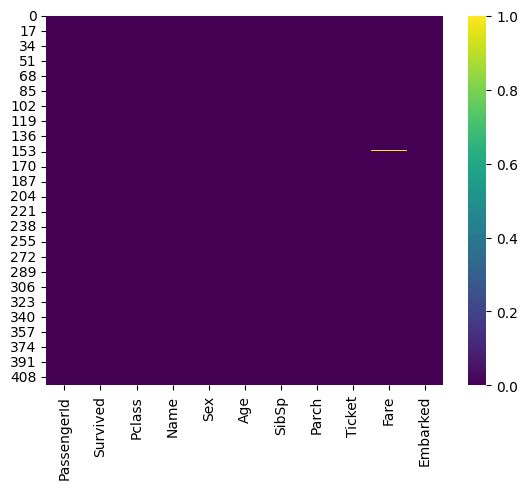

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis');

Nettoyages des donnees manquantes de la colonne Cabin




In [ ]:
# pour cette colonne il ya plus de donnees manqante .
# de plus il s'agit de donnees non numeriques (codes donnes)
# on on peut simplement et purement supprimer cette colonne

df.drop("Cabin",
        axis=1,
        inplace=True #Pour suprimmer ca definitivement de la df
        )

In [ ]:
df.head()

Nettoyages des donnees manquantes de la colonne Fare


In [ ]:
# il manque seulement  une  valeur dans cette colonne, donc on supprime simplement et purement cette valeur

df.dropna(inplace=True)

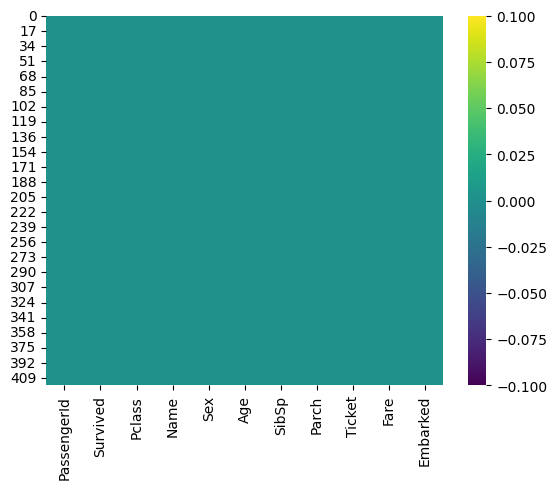

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis');

In [ ]:
# nous venons  de nettoyer nos donnees sur les valeurs manquantes

Les algorithms de ML n'utilisent que des valeurs numiques (float, int) . Ainsi, les colonnes de type object()  peuvent as etre utilisees par les algorithms de ML.
Donc dans votre dataframe, si vous avez des colonnes categorielles  qui doivent etre utilisees pour l'apprentissage, il faut d'abord les convertir en valeurs fictives ou dumies (qui seront ainsi des nombres et pouront donc etre utilisees  par le model de ML )

# **Convertion des Caracteristiques ou  Features ou Colonnes categorielles en  Variables dumies ou fictives**

Les colonnes Sex et Emparcated sont des colonnes categorielles (type object )tres importantes pour notre prediction.
Donc il faut les convertir en donnees numeric ou fictives ou dumies

In [ ]:
# conversion de la colonne sex en variable dumies

sex  = pd.get_dummies(df['Sex'], drop_first=True)

# get_dumies() est une methode permettant de convertir des objets en valeurs numeric

sex

In [ ]:
# conversion de la colonne Embarked en variable dumies

embark  = pd.get_dummies(df['Embarked'], drop_first=True)

# get_dumies() est une methode permettant de convertir des objets en valeurs numeric

embark

In [ ]:
 # Supprimons les colonnes  qu'on aura plus besoin

 df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
# Ajoutons nos variable(colonnes dumies) a notre dataframe

df = pd.concat([df, sex, embark], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


Specification  de  nos Features de notre label

In [ ]:
X = df.drop('Survived', axis=1)
X

In [ ]:
y = df['Survived']
y

**Separation de notre df en train df et test df**




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Construction de notre model de Regression Logistic de classification**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# instancier notre model

model = LogisticRegression(solver='liblinear')

In [ ]:
# entraimement de notre model

model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# prediction de notre model

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

**Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Comparer les predictions avec les true labels (y_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        61

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
confusion_matrix(y_test, y_pred)

array([[65,  0],
       [ 0, 61]])

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [ ]:
# notre model est pret pour toutes noulelles donness .

# essayons

data = [[182, 1, 4, 26.0, 2, 25, 0, 0, 1]]

df = pd.DataFrame(data, columns=['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','male', 'Q', 'S' ])

model.predict(df)

array([1])

In [ ]:
d